In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

# Basic data anlaysis( which will be essential to train our model)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

# Handeling nonnumeric variable(character)

In [13]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
df.shape

(10000, 12)

In [16]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [17]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


# Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Model 

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-08-11 12:19:15.056796: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 12:19:15.056967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 12:19:15.219101: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
model=Sequential()
model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=["accuracy"])

In [25]:
mew=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4778 - loss: 0.8127 - val_accuracy: 0.6737 - val_loss: 0.6527
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7092 - loss: 0.6276 - val_accuracy: 0.7800 - val_loss: 0.5459
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.5369 - val_accuracy: 0.7956 - val_loss: 0.4919
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8113 - loss: 0.4745 - val_accuracy: 0.7969 - val_loss: 0.4694
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4739 - val_accuracy: 0.7975 - val_loss: 0.4576
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7957 - loss: 0.4533 - val_accuracy: 0.7950 - val_loss: 0.4498
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8042 - loss: 0.4446 - val_accuracy: 0.7969 - val_loss: 0.4439
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.4379 - val_accu

In [26]:
model.layers[0].get_weights()

[array([[-0.14252456, -0.03258888,  0.15033728],
        [ 0.16745856, -0.28320763, -1.4546882 ],
        [ 0.14602749, -0.00299428, -0.1199256 ],
        [-0.63740677, -0.6659627 , -0.12690271],
        [-1.0117831 , -2.001994  , -0.67333204],
        [ 0.0899214 , -0.00992294, -0.05095392],
        [ 0.8801565 , -0.10077588, -0.5824754 ],
        [ 0.0193702 ,  0.06009466,  0.01796628],
        [ 0.05511784,  0.31012583,  0.04854481],
        [ 0.06005839, -0.07741371, -0.20080851],
        [ 0.3216184 ,  0.13540511,  0.06976798]], dtype=float32),
 array([2.1165912, 0.5985794, 1.7986928], dtype=float32)]

In [27]:
model.layers[1].get_weights()

[array([[-1.1387719],
        [ 1.8449156],
        [-1.268672 ]], dtype=float32),
 array([0.92567575], dtype=float32)]

In [28]:
y_mew=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_mew

array([[0.05236682],
       [0.10704505],
       [0.08086182],
       ...,
       [0.01363414],
       [0.03406988],
       [0.45789787]], dtype=float32)

In [30]:
# let the thereshold be 0.5 
y_pred=np.where(y_mew>0.5,1,0)

In [31]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8555

# Plots

In [33]:
mew.history

{'accuracy': [0.5545312762260437,
  0.7364062666893005,
  0.7914062738418579,
  0.7979687452316284,
  0.7978125214576721,
  0.7990624904632568,
  0.8006250262260437,
  0.801562488079071,
  0.8020312786102295,
  0.8045312762260437,
  0.8070312738418579,
  0.8104687333106995,
  0.8137500286102295,
  0.81640625,
  0.8189062476158142,
  0.8207812309265137,
  0.8228124976158142,
  0.8239062428474426,
  0.8248437643051147,
  0.8259375095367432,
  0.8282812237739563,
  0.828125,
  0.8271874785423279,
  0.828125,
  0.8287500143051147,
  0.8299999833106995,
  0.8301562666893005,
  0.831250011920929,
  0.8314062356948853,
  0.8324999809265137,
  0.832812488079071,
  0.83203125,
  0.832812488079071,
  0.8310937285423279,
  0.8326562643051147,
  0.8315625190734863,
  0.8309375047683716,
  0.832812488079071,
  0.8324999809265137,
  0.8323437571525574,
  0.8314062356948853,
  0.8310937285423279,
  0.8314062356948853,
  0.8321874737739563,
  0.8326562643051147,
  0.8326562643051147,
  0.8321874737739

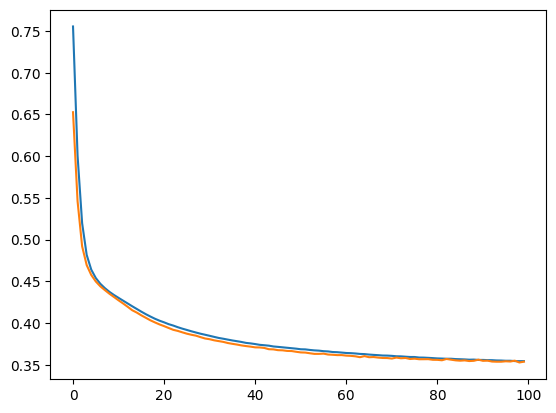

In [34]:
plt.plot(mew.history['loss'])
plt.plot(mew.history['val_loss'])

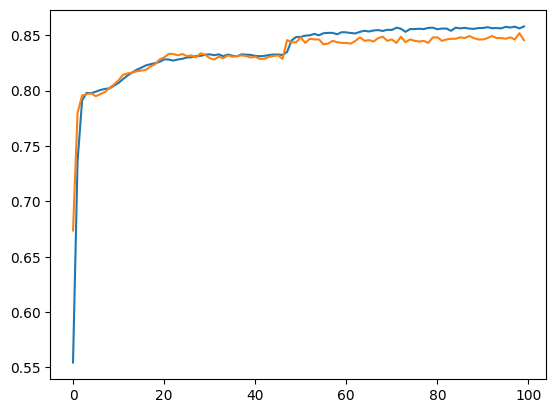

In [35]:
plt.plot(mew.history['accuracy'])
plt.plot(mew.history['val_accuracy'])